#### O problema da gorjeta é comumente usado para ilustrar o poder dos princípios da Lógica e Controle Fuzzy <br> <br> para gerar comportamento complexo a partir de um conjunto compacto e intuitivo de regras especializadas.
- Seres humanos são capazes de lidar com processos bastante complexos, baseados em informações imprecisas ou aproximadas. A estratégia adotada pelos operadores humanos é também de natureza imprecisa e geralmente possível de ser expressa em termos linguísticos. A teoria de conjuntos fuzzy e os conceitos de lógica fuzzy podem ser utilizados para traduzir em termos matemáticos a informação imprecisa expressa por um conjunto de regras linguísticas. Se um operador humano for capaz de articular sua estratégia de ação como um conjunto de regras da forma se-então, um algoritmo passível de ser implementado em computador pode ser construído. O resultado é um sistema de inferência baseado em regras, no qual a Teoria de conjuntos fuzzy e lógica fuzzy fornecem o ferramental matemático para se lidar com as tais regras linguísticas.


- Vamos criar um sistema de controle fuzzy que modele como você pode escolher dar uma gorjeta em um restaurante. Na hora da gorjeta, você leva em consideração o atendimento e a qualidade da comida, avaliada entre uma nota de 0 a 10. Você usa para deixar uma gorjeta entre 0 e 20%. Nós formulamos esse problema da seguinte forma:

#### Antecedentes (entradas)

#### Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- Os conjuntos Fuzzy são: Ruim, Boa, Excelente.

#### Qualidade do serviço: quão bom o serviço era, em uma escala de 0 a 10?
- Os conjuntos Fuzzy são: Ruim, Bom, Ótimo.

#### Consequentes (saídas)
- Os conjuntos Fuzzy são: Baixa, Média, Alta.

#### Regras Fuzzy do Tipo Se-Então
- Regra 1: Se a qualidade da comida for RUIM ou o serviço for RUIM, então a gorjeta é BAIXA.
- Regra 2: Se o serviço for BOM, então a gorjeta é MÉDIA.
- Regra 3: Se o serviço for ÓTIMO ou a qualidade da comida for EXCELENTE, então a gorjeta será ALTA.

O percentual da gorjeta a ser dada é de 11.89%.


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


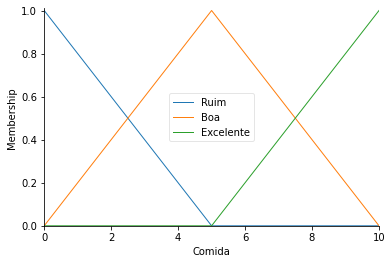

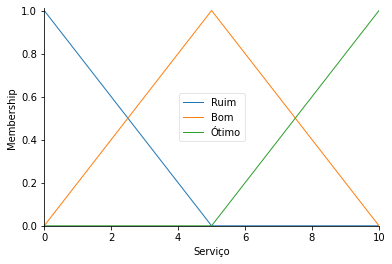

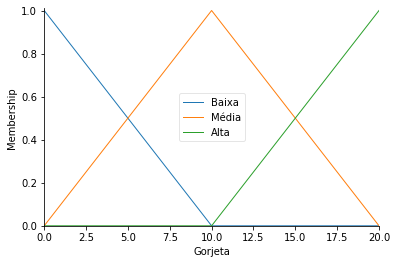

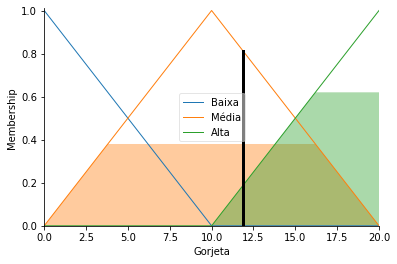

In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctl

# Definir antecedentes e consequentes
comida = ctl.Antecedent(np.arange(0, 11, 1), 'Comida')
servico = ctl.Antecedent(np.arange(0, 11, 1), 'Serviço')
gorjeta = ctl.Consequent(np.arange(0, 21, 1), 'Gorjeta')

# Funções de pertinência
comida.automf(number = 3, names = ['Ruim', 'Boa', 'Excelente'])
servico.automf(number = 3, names = ['Ruim', 'Bom', 'Ótimo'])

gorjeta['Baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10])
gorjeta['Média'] = fuzz.trimf(gorjeta.universe, [0, 10, 20])
gorjeta['Alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20])

# Visualizar funções de pertinência
comida.view()
servico.view()
gorjeta.view()

# Regras Fuzzy
regra01 = ctl.Rule(comida['Ruim'] | servico['Ruim'], gorjeta['Baixa'])
regra02 = ctl.Rule(servico['Bom'], gorjeta['Média'])
regra03 = ctl.Rule(comida['Excelente'] | servico['Ótimo'], gorjeta['Alta'])

# Criar sistema de controle
base_regras = ctl.ControlSystem([regra01, regra02, regra03])
sistema_fuzzy = ctl.ControlSystemSimulation(base_regras)

# Simular o sistema fuzzy
sistema_fuzzy.input['Comida'] = 7.2
sistema_fuzzy.input['Serviço'] = 8.1
sistema_fuzzy.compute()

# Apresentar ao usuário a resposta do sistema fuzzy
print('O percentual da gorjeta a ser dada é de {:.2f}%.'.format(sistema_fuzzy.output['Gorjeta']))
gorjeta.view(sim = sistema_fuzzy) # Visualizar a saída do sistema fuzzy dada as entradas apresentadas